<a href="https://colab.research.google.com/github/PattarapornH/mnist/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
num_of_train_samples = X_train.shape[0]
num_of_test_samples = X_test.shape[0]
row = X_train.shape[1]
col = X_train.shape[2]

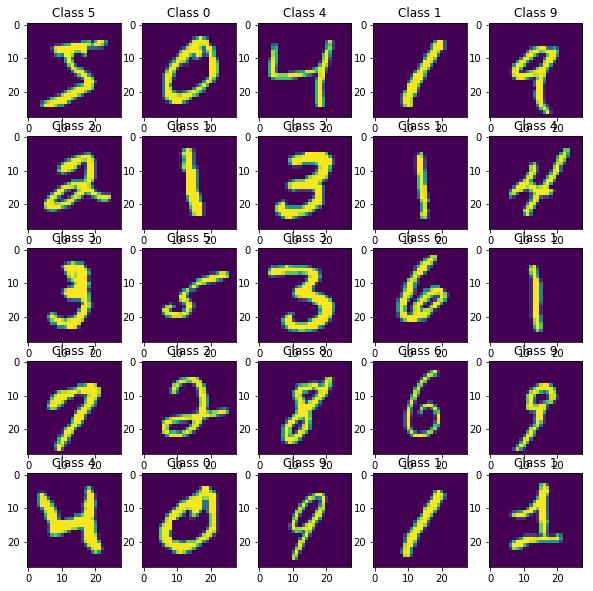

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title("Class {}".format(y_train[i]))

In [0]:
# RGB 0-255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(num_of_train_samples, row*col)
X_test = X_test.reshape(num_of_test_samples, row*col)

In [0]:
# convert to binary
y_train_bin = np_utils.to_categorical(y_train, 10)
y_test_bin = np_utils.to_categorical(y_test, 10)

In [7]:
# Init NN
model = Sequential()

# Input layer
model.add(Dense(512, activation='relu', input_shape=(row*col,)))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train_bin,batch_size=100,epochs=200,validation_data=(X_test,y_test_bin))

score = model.evaluate(X_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 13s 209us/step - loss: 0.0074 - acc: 0.9982 - val_loss: 0.1434 - val_acc: 0.9841
Epoch 2/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.0138 - acc: 0.9976 - val_loss: 0.1510 - val_acc: 0.9836
Epoch 3/200
60000/60000 [==============================] - 12s 206us/step - loss: 0.0141 - acc: 0.9975 - val_loss: 0.1405 - val_acc: 0.9843
Epoch 4/200
60000/60000 [==============================] - 13s 209us/step - loss: 0.0102 - acc: 0.9983 - val_loss: 0.1359 - val_acc: 0.9849
Epoch 5/200
60000/60000 [==============================] - 12s 203us/step - loss: 0.0134 - acc: 0.9977 - val_loss: 0.1470 - val_acc: 0.9841
Epoch 6/200
60000/60000 [==============================] - 12s 202us/step - loss: 0.0110 - acc: 0.9980 - val_loss: 0.1331 - val_acc: 0.9857
Epoch 7/200
60000/60000 [==============================] - 12s 198us/step - loss: 0.0111 - acc: 0.9980 - val_l

In [0]:
predicted = model.predict_classes(X_test)

In [0]:
# predicted = np.array(predicted)
corrected = []
incorrected = []
for i in range(len(predicted)):
    if(predicted[i] == y_test[i]):
        corrected.append(int(i))
    else:
        incorrected.append(int(i))

In [21]:
corr = len(corrected)
incorr = len(incorrected)
print(corr,incorr)

9862 138
